In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Load the dataset
df = pd.read_csv('expanded_train.csv')  # Replace with your dataset file name

# Display the first few rows of the dataset
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Handle missing values: Option 1 - Drop rows with NaN values
df.dropna(subset=['text', 'label'], inplace=True)

# Alternatively, Option 2 - Fill NaN values with an empty string

# Define features and target variable
X = df['text']  # Feature matrix (news articles)
y = df['label']  # Target variable (fake/real)

# Vectorization: Convert text data into numerical format using TF-IDF
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Initialize and train the Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

   id                                              title              author  \
0   0  House Dem Aide: We Didn’t Even See Comey’s Let...       Darrell Lucus   
1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...     Daniel J. Flynn   
2   2                  Why the Truth Might Get You Fired  Consortiumnews.com   
3   3  15 Civilians Killed In Single US Airstrike Hav...     Jessica Purkiss   
4   4  Iranian woman jailed for fictional unpublished...      Howard Portnoy   

                                                text  label  
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1  
1  Ever get the feeling your life circles the rou...      0  
2  Why the Truth Might Get You Fired October 29, ...      1  
3  Videos 15 Civilians Killed In Single US Airstr...      1  
4  Print \nAn Iranian woman has been sentenced to...      1  
id           0
title      558
author    1957
text        39
label        0
dtype: int64
              precision    recall  f1-score   support

    

In [3]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.36      0.53      5038
           1       0.61      0.99      0.76      5115

    accuracy                           0.68     10153
   macro avg       0.79      0.68      0.64     10153
weighted avg       0.79      0.68      0.64     10153



In [4]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      5038
           1       0.98      0.96      0.97      5115

    accuracy                           0.97     10153
   macro avg       0.97      0.97      0.97     10153
weighted avg       0.97      0.97      0.97     10153



In [5]:
from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5038
           1       0.99      0.99      0.99      5115

    accuracy                           0.99     10153
   macro avg       0.99      0.99      0.99     10153
weighted avg       0.99      0.99      0.99     10153



In [6]:
import xgboost as xgb

model = xgb.XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5038
           1       0.99      0.99      0.99      5115

    accuracy                           0.99     10153
   macro avg       0.99      0.99      0.99     10153
weighted avg       0.99      0.99      0.99     10153



In [7]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5038
           1       0.97      0.97      0.97      5115

    accuracy                           0.97     10153
   macro avg       0.97      0.97      0.97     10153
weighted avg       0.97      0.97      0.97     10153



In [4]:
pip install matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

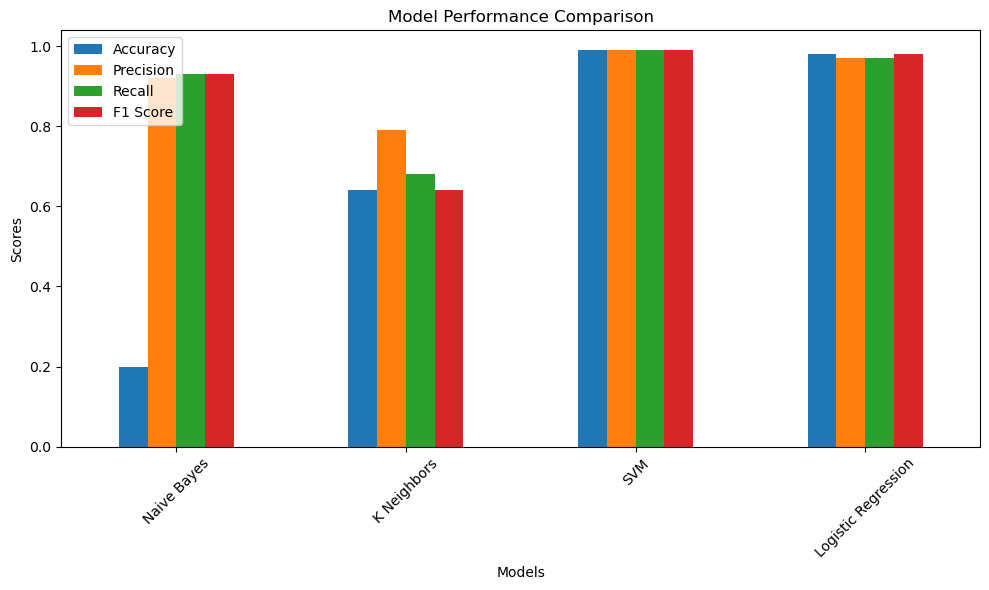

In [6]:
# Example metrics for different models (replace with your actual metrics)
models = [ 'Naive Bayes','K Neighbors', 'SVM','Logistic Regression']
accuracy = [0.2, 0.64, 0.99,0.98]
precision = [0.92, 0.79, 0.99,0.97]
recall = [0.93, 0.68, 0.99,0.97]
f1_score = [0.93, 0.64, 0.99,0.98]

# Create a DataFrame for easier plotting
metrics_df = pd.DataFrame({
    'Models': models,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1_score
})

# Set the index to Models for easier plotting
metrics_df.set_index('Models', inplace=True)

# Plotting the metrics
metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

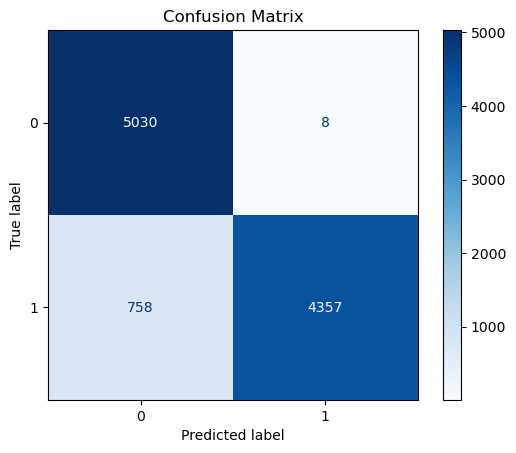

In [3]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming y_test and y_pred are defined
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()